In [1]:
import pandas as pd 
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt 

df = pd.read_csv("../../Tascas/Data/DelayedFlights.csv")

In [2]:
df = df.dropna(subset = ["ArrDelay"])
df = df.sample(frac=1).head(100000)
Y = df["ArrDelay"]
X = df[["DepDelay"]]

In [3]:
df.columns

Index(['Unnamed: 0', 'Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime',
       'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum',
       'TailNum', 'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [4]:
# ajustar el modelo
regr = linear_model.LinearRegression()
regr.fit(X,Y)

print("Coeficientes: ", regr.coef_)  # coeficiente beta
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

Coeficientes:  [1.01772357]
R cuadrado:  0.9113842527354402


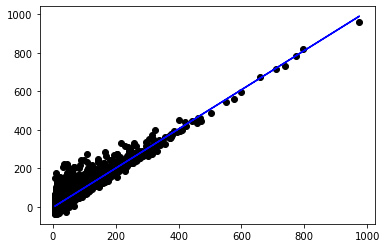

In [5]:
plt.scatter(X[1:10000], Y[1:10000], color = "black")  # dibujamos los puntos
plt.plot(X[1:10000], Y_pred[1:10000], color = "Blue")   # recta de regresion
plt.show()

In [8]:
X = df[['AirTime','Distance','TaxiIn','TaxiOut']]

df["Month"] = df["Month"].apply(str) # convertimos en string para que sean categoricas 
df["DayofMonth"] = df["DayofMonth"].apply(str) 
df["DayOfWeek"] = df["DayOfWeek"].apply(str) 

dummies = pd.get_dummies(data=df[['Month','DayofMonth', 'DayOfWeek', 'Origin', 'Dest']])
X = dummies.add(X, fill_value=0)

In [9]:
X.columns

Index(['AirTime', 'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'DayofMonth_1',
       'DayofMonth_10',
       ...
       'Origin_TYS', 'Origin_VLD', 'Origin_VPS', 'Origin_WRG', 'Origin_XNA',
       'Origin_YAK', 'Origin_YKM', 'Origin_YUM', 'TaxiIn', 'TaxiOut'],
      dtype='object', length=646)

In [10]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#print("Coeficientes: ", regr.coef_)  # coeficiente beta
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.14831388991781846


In [11]:
X = X.add(df[["DepDelay"]], fill_value=0)  #añadimos retraso salida

In [12]:
regr = linear_model.LinearRegression()
regr.fit(X,Y)

#print("Coeficientes: ", regr.coef_)  # coeficiente beta
Y_pred = regr.predict(X)
print("R cuadrado: ", r2_score(Y, Y_pred))

R cuadrado:  0.9860342817378772
